##  1

In [1]:
from os.path import abspath, dirname, join
import sys
import math
try:
    from ompl import util as ou
    from ompl import base as ob
    from ompl import geometric as og
except ImportError:
    # if the ompl module is not in the PYTHONPATH assume it is installed in a
    # subdirectory of the parent directory called "py-bindings."
    sys.path.insert(0, join(dirname(dirname(abspath(__file__))), 'py-bindings'))
    from ompl import util as ou
    from ompl import base as ob
    from ompl import geometric as og
from functools import partial

def isStateValid(spaceInformation, state):
    p = state[0][0]
    t = spaceInformation.getStateSpace().getStateTime(state)
    return t >= 0 and p < math.inf

class SpaceTimeMotionValidator(ob.MotionValidator):
    def checkMotion(self, s1, s2):
      if not si.isValid(s2):
        return False
      delta_pos = si.getStateSpace().distanceSpace(s1, s2)
      # delta_t = si.getStateSpace().distanceTime(s1, s2)
      t1 = si.getStateSpace().getStateTime(s1)
      t2 = si.getStateSpace().getStateTime(s2)
      delta_t = t2 - t1
      if delta_t <= 0 :
        return False
      if (delta_pos / delta_t) > si.getStateSpace().getVMax() :
        return False
      return True

vMax = 0.2
vector_space = ob.RealVectorStateSpace(1)
bounds = ob.RealVectorBounds(1)
bounds.setLow(-1.0)
bounds.setHigh(1.0)
vector_space.setBounds(bounds)

space = ob.SpaceTimeStateSpace(vector_space, vMax) 
space.setTimeBounds(0.0, 10.0);

si = ob.SpaceInformation(space)
si.setMotionValidator(SpaceTimeMotionValidator(si))
si.setStateValidityChecker(ob.StateValidityCheckerFn( \
    partial(isStateValid, si)))

pdef = ob.ProblemDefinition(si)

start = ob.State(space)
start()[0][0] = 0.0
goal = ob.State(space)
goal()[0][0] = 1.0
pdef.setStartAndGoalStates(start, goal)

strrt = og.STRRTstar(si)
strrt.setRange(vMax)
strrt.setProblemDefinition(pdef)
strrt.setup()

result = strrt.solve(1.0)
print("Done planning.")

if result:
  print("Found path of length", pdef.getSolutionPath().length())
  print("Path:", pdef.getSolutionPath().printAsMatrix())
else:
  print("No solution found.")

Info:    SpaceTimeRRT: Space information setup was not yet called. Calling now.
Info:    SpaceTimeRRT: Starting planning with 1 states already in datastructure
Info:    SpaceTimeRRT: Starting planning with time bound factor 2.00


KeyboardInterrupt: 

In [2]:
from os.path import abspath, dirname, join
import sys
import math
try:
    from ompl import util as ou
    from ompl import base as ob
    from ompl import geometric as og
except ImportError:
    # if the ompl module is not in the PYTHONPATH assume it is installed in a
    # subdirectory of the parent directory called "py-bindings."
    sys.path.insert(0, join(dirname(dirname(abspath(__file__))), 'py-bindings'))
    from ompl import util as ou
    from ompl import base as ob
    from ompl import geometric as og
from functools import partial

def isStateValid(spaceInformation, state):
    p = state[0][0]
    t = spaceInformation.getStateSpace().getStateTime(state)
    return t >= 0 and p < math.inf

class SpaceTimeMotionValidator(ob.MotionValidator):
    def checkMotion(self, s1, s2):
      if not si.isValid(s2):
        return False
      delta_pos = si.getStateSpace().distanceSpace(s1, s2)
      # delta_t = si.getStateSpace().distanceTime(s1, s2)
      t1 = si.getStateSpace().getStateTime(s1)
      t2 = si.getStateSpace().getStateTime(s2)
      delta_t = t2 - t1
      if delta_t <= 0 :
        return False
      if (delta_pos / delta_t) > si.getStateSpace().getVMax() :
        return False
      return True

vMax = 1
vector_space = ob.RealVectorStateSpace(4)
bounds = ob.RealVectorBounds(4)
bounds.setLow(-5)
bounds.setHigh(15)
vector_space.setBounds(bounds)

space = ob.SpaceTimeStateSpace(vector_space, vMax) 
space.setTimeBounds(0.0, 40);

si = ob.SpaceInformation(space)
si.setMotionValidator(SpaceTimeMotionValidator(si))
si.setStateValidityChecker(ob.StateValidityCheckerFn( \
    partial(isStateValid, si)))

pdef = ob.ProblemDefinition(si)


start = ob.State(space)
start()[0][0] = 0.0
start()[0][1] = 0.0
start()[0][2] = 5.0
start()[0][3] = 5.0
goal = ob.State(space)
goal()[0][0] = 1.0
goal()[0][1] = 1.0
goal()[0][2] = 9.0
goal()[0][3] = 9.0

pdef.setStartAndGoalStates(start, goal)

strrt = og.STRRTstar(si)
strrt.setRange(vMax)
strrt.setProblemDefinition(pdef)
strrt.setup()

result = strrt.solve(1.0)
print("Done planning.")

if result:
  print("Found path of length", pdef.getSolutionPath().length())
  print("Path:", pdef.getSolutionPath().printAsMatrix())
else:
  print("No solution found.")

Info:    SpaceTimeRRT: Space information setup was not yet called. Calling now.
Info:    SpaceTimeRRT: Starting planning with 1 states already in datastructure
Info:    SpaceTimeRRT: Starting planning with time bound factor 2.00
Done planning.Info:    SpaceTimeRRT: Created 1224 states (19 start + 1205 goal)

Found path of length 6.578342366370769
Path: 0 0 5 5 0 
0.468609 0.673745 5.4518 5.33233 1.00597 
0.873417 1.02025 6.0259 5.94427 2.01199 
0.910116 0.99163 6.7026 6.59213 3.07401 
1.10275 0.997047 7.42739 7.21324 4.10023 
1.29539 1.00246 8.15218 7.83436 5.12645 
1.4068 1.0056 8.57135 8.19358 5.71996 
1 1 9 9 6.72018 




## 2

In [3]:
from os.path import abspath, dirname, join
import sys
import math
try:
    from ompl import util as ou
    from ompl import base as ob
    from ompl import geometric as og
except ImportError:
    sys.path.insert(0, join(dirname(dirname(abspath(__file__))), 'py-bindings'))
    from ompl import util as ou
    from ompl import base as ob
    from ompl import geometric as og
from functools import partial
import pygame
import sys
import numpy as np

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
(trajectories['obst1'])

[(0.2, 0.2, 0.0035, 0.0025),
 (0.2033458829253522,
  0.20238020967621412,
  0.0033458829253521904,
  0.0023802096762141124),
 (0.20660851781110953,
  0.20454184081296628,
  0.0032626348857573437,
  0.002161631136752172),
 (0.20985925765221064,
  0.20681628134987085,
  0.003250739841101108,
  0.0022744405369045663),
 (0.21317805914122084,
  0.20905601344080682,
  0.003318801489010213,
  0.002239732090935984),
 (0.21652295773608743,
  0.21106780370219755,
  0.003344898594866598,
  0.002011790261390739),
 (0.21995626347385516,
  0.2132599248740172,
  0.0034333057377677464,
  0.0021921211718196622),
 (0.22339010516614258,
  0.21557672862346797,
  0.003433841692287428,
  0.002316803749450761),
 (0.22665173732150393,
  0.21789419111388938,
  0.003261632155361336,
  0.002317462490421409),
 (0.22989633923781452,
  0.2204328003474851,
  0.003244601916310591,
  0.002538609233595736),
 (0.23307412574058153,
  0.2228368012324038,
  0.0031777865027670057,
  0.002404000884918672),
 (0.23647415075700

In [5]:
T_max = 20
N_max = 1000
dt = T_max / N_max
print(dt, 0.5/dt)

def get_xy(t, trajectories, obstacle):
   t1 = int(t/dt) * dt
   n1 = int(t/dt)
   x1 = trajectories[obstacle][n1][0]
   y1 = trajectories[obstacle][n1][1]
   x2 = trajectories[obstacle][n1 + 1][0]
   y2 = trajectories[obstacle][n1 + 1][1]
   return x1 + (t - t1)/dt*(x2 - x1), y1 + (t - t1)/dt*(y2 - x1)

get_xy(0.51, trajectories, 'obst1'), trajectories['obst1'][25][0], trajectories['obst1'][25][1],

0.02 25.0


((0.270864657328412, 0.2595173080783137),
 0.26955768436652927,
 0.261996813157092)

In [20]:
#(center_x, center_y, radius)
%time
radius_agent = 0.01
start_ = (0.05, 0.05)
goal_ = (0.95, 0.95)

T_max = 20
N_max = 1000
dt = T_max / N_max


def isStateValid(spaceInformation, state):
    p = state[0][0] 
    t = spaceInformation.getStateSpace().getStateTime(state)
    valid = True
    for obstacle in obstacles_info:
       x, y = get_xy(t, trajectories, obstacle)
       circle_radius = obstacles_info[obstacle]
       valid *= ((state[0][0] - x)**2 + (state[0][1] - y)**2 > (circle_radius + radius_agent + 0.1)**2)
       if not valid:
          return False
    return t >= 0 and p < math.inf and valid

class SpaceTimeMotionValidator(ob.MotionValidator):
    def checkMotion(self, s1, s2):
      if not si.isValid(s2):
        return False
      delta_pos = si.getStateSpace().distanceSpace(s1, s2)
      # delta_t = si.getStateSpace().distanceTime(s1, s2)
      t1 = si.getStateSpace().getStateTime(s1)
      t2 = si.getStateSpace().getStateTime(s2)
      delta_t = t2 - t1
      if delta_t <= 0 :
        return False
      if (delta_pos / delta_t) > si.getStateSpace().getVMax() :
        return False
      return True
vMax = 0.15
vector_space = ob.RealVectorStateSpace(2)
bounds = ob.RealVectorBounds(2)
bounds.setLow(-1)
bounds.setHigh(1)
vector_space.setBounds(bounds)

space = ob.SpaceTimeStateSpace(vector_space, vMax) 
space.setTimeBounds(0.0, 20);

si = ob.SpaceInformation(space)
si.setMotionValidator(SpaceTimeMotionValidator(si))
si.setStateValidityChecker(ob.StateValidityCheckerFn( \
    partial(isStateValid, si)))

pdef = ob.ProblemDefinition(si)


start = ob.State(space)
start()[0][0] = start_[0]
start()[0][1] = start_[1]
goal = ob.State(space)
goal()[0][0] = goal_[0]
goal()[0][1] = goal_[1]

pdef.setStartAndGoalStates(start, goal)

strrt = og.STRRTstar(si)
strrt.setRange(vMax)
strrt.setProblemDefinition(pdef)
strrt.setup()

result = strrt.solve(1.0)
print("Done planning.")

if result:
  print("Found path of length", pdef.getSolutionPath().length())
  print("Path:", pdef.getSolutionPath().printAsMatrix())
else:
  print("No solution found.")


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
Done planning.
No solution found.


         at line 248 in /home/alex/ompl/ompl/src/ompl/base/src/Planner.cpp
Error:   SpaceTimeRRT: Motion planning start tree could not be initialized!
         at line 142 in /home/alex/ompl/ompl/src/ompl/geometric/planners/rrt/src/STRRTstar.cpp


Info:    SpaceTimeRRT: Space information setup was not yet called. Calling now.
Debug:   SpaceTimeRRT: Discarded start state Compound state [
RealVectorState [0.05 0.05]
TimeState [0]
]



In [7]:
import numpy as np
def parse_path(data_str):
    lines = data_str.split('\n')
    table = []
    for line in lines:
        if line.strip():
            row = [float(num) for num in line.split()]
            table.append(row)
    return pyb.array(table)

In [8]:
path = parse_path(pdef.getSolutionPath().printAsMatrix())
path

array([[0.05     , 0.05     , 0.       ],
       [0.0778202, 0.0775174, 0.26087  ],
       [0.105544 , 0.105129 , 0.521742 ],
       [0.133209 , 0.1328   , 0.782613 ],
       [0.160875 , 0.160471 , 1.04348  ],
       [0.18854  , 0.188142 , 1.30436  ],
       [0.216206 , 0.215812 , 1.56523  ],
       [0.243872 , 0.243483 , 1.8261   ],
       [0.271537 , 0.271154 , 2.08697  ],
       [0.299203 , 0.298825 , 2.34784  ],
       [0.326869 , 0.326495 , 2.60871  ],
       [0.354534 , 0.354166 , 2.86958  ],
       [0.3822   , 0.381837 , 3.13045  ],
       [0.409866 , 0.409508 , 3.39133  ],
       [0.437531 , 0.437178 , 3.6522   ],
       [0.465197 , 0.464849 , 3.91307  ],
       [0.492862 , 0.49252  , 4.17394  ],
       [0.520528 , 0.520191 , 4.43481  ],
       [0.548194 , 0.547861 , 4.69568  ],
       [0.575859 , 0.575532 , 4.95655  ],
       [0.603525 , 0.603203 , 5.21742  ],
       [0.631191 , 0.630874 , 5.4783   ],
       [0.658856 , 0.658544 , 5.73917  ],
       [0.686522 , 0.686215 , 6.00

In [9]:
import numpy as np
from scipy.interpolate import interp1d

# Given array
array = pyb.array(path)

# Extract x, y, and time coordinates from the array
x = array[:, 0]
y = array[:, 1]
time = array[:, 2]

# Create interpolation functions for x and y coordinates with respect to time
interp_x = interp1d(time, x, kind='linear', fill_value='extrapolate')
interp_y = interp1d(time, y, kind='linear', fill_value='extrapolate')

# Generate the time grid from 0 to 20
time_grid = pyb.arange(0, 20.02, 0.02)

# Interpolate x and y coordinates onto the time grid
x_grid = interp_x(time_grid)
y_grid = interp_y(time_grid)

# Combine x and y grids into a single array
interpolated_array = pyb.column_stack((x_grid, y_grid, time_grid))

for i in range(len(interpolated_array)):
    if interpolated_array[i][2] > array[-1][2]:
        interpolated_array[i][0] = array[-1][0]
        interpolated_array[i][1] = array[-1][1]
# Display the interpolated array
(interpolated_array)


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


array([[ 0.05      ,  0.05      ,  0.        ],
       [ 0.05213288,  0.05210966,  0.02      ],
       [ 0.05426576,  0.05421933,  0.04      ],
       ...,
       [ 0.95      ,  0.95      , 19.96      ],
       [ 0.95      ,  0.95      , 19.98      ],
       [ 0.95      ,  0.95      , 20.        ]])

In [10]:
len(interpolated_array)

1001

In [11]:
a = []
for i in range(len(interpolated_array)):
    a.append((float(interpolated_array[i][0]), float(interpolated_array[i][1]), 0.0, 0.0))

In [15]:
del obstacles_info['agent1'] 
del trajectories['agent1'] 

KeyError: 'agent1'

In [16]:
obstacles_info, trajectories['agent1']

KeyError: 'agent1'

In [12]:
type(a[1][1])

float

In [13]:
obstacles_info['agent1'] = 0.101
trajectories['agent1'] = a

In [14]:
obstacles_info

{'obst1': 0.075,
 'obst2': 0.075,
 'obst3': 0.075,
 'obst4': 0.075,
 'agent1': 0.101}

In [15]:
#(center_x, center_y, radius)
radius_agent = 0.01
start_ = (0.95, 0.05)
goal_ = (0.05, 0.95)

T_max = 20
N_max = 1000
dt = T_max / N_max


def isStateValid(spaceInformation, state):
    p = state[0][0] 
    t = spaceInformation.getStateSpace().getStateTime(state)
    valid = True
    for obstacle in obstacles_info:
       x, y = get_xy(t, trajectories, obstacle)
       circle_radius = obstacles_info[obstacle]
       valid *= ((state[0][0] - x)**2 + (state[0][1] - y)**2 > (circle_radius + radius_agent + 0.05)**2)
       if not valid:
          return False
    return t >= 0 and p < math.inf and valid and (0 < state[0][0] < 1) and (0 < state[0][1] < 1)

class SpaceTimeMotionValidator(ob.MotionValidator):
    def checkMotion(self, s1, s2):
      if not si.isValid(s2):
        return False
      delta_pos = si.getStateSpace().distanceSpace(s1, s2)
      # delta_t = si.getStateSpace().distanceTime(s1, s2)
      t1 = si.getStateSpace().getStateTime(s1)
      t2 = si.getStateSpace().getStateTime(s2)
      delta_t = t2 - t1
      if delta_t <= 0 :
        return False
      if (delta_pos / delta_t) > si.getStateSpace().getVMax() :
        return False
      return True
vMax = 0.15
vector_space = ob.RealVectorStateSpace(2)
bounds = ob.RealVectorBounds(2)
bounds.setLow(-1)
bounds.setHigh(1)
vector_space.setBounds(bounds)

space = ob.SpaceTimeStateSpace(vector_space, vMax) 
space.setTimeBounds(0.0, 20);

si = ob.SpaceInformation(space)
si.setMotionValidator(SpaceTimeMotionValidator(si))
si.setStateValidityChecker(ob.StateValidityCheckerFn( \
    partial(isStateValid, si)))

pdef = ob.ProblemDefinition(si)


start = ob.State(space)
start()[0][0] = start_[0]
start()[0][1] = start_[1]
goal = ob.State(space)
goal()[0][0] = goal_[0]
goal()[0][1] = goal_[1]

pdef.setStartAndGoalStates(start, goal)

strrt = og.STRRTstar(si)
strrt.setRange(vMax)
strrt.setProblemDefinition(pdef)
strrt.setup()

result = strrt.solve(float(1.0))
print("Done planning.")

if result:
  print("Found path of length", pdef.getSolutionPath().length())
  print("Path:", pdef.getSolutionPath().printAsMatrix())
else:
  print("No solution found.")


Info:    SpaceTimeRRT: Space information setup was not yet called. Calling now.
Info:    SpaceTimeRRT: Starting planning with 1 states already in datastructure
Info:    SpaceTimeRRT: Starting planning with time bound factor 2.00
Done planning.
Found path of length 6.547792637431666
Path: 0.95 0.05 0 
0.915993 0.0504921 0.265989 
0.896997 0.0710776 0.537978 
0.883862 0.0845004 0.819198 
0.870728 0.0979233 1.10042 
0.847085 0.085008 1.37348 
0.83405 0.0984642 1.65474 
0.821014 0.11192 1.93601 
0.807979 0.125377 2.21727 
0.794944 0.138833 2.49854 
0.781909 0.152289 2.7798 
0.754974 0.180561 3.04076 
0.728039 0.208832 3.30171 
0.701105 0.237104 3.56266 
0.67417 0.265376 3.82361 
0.647235 0.293648 4.08456 
0.620301 0.321919 4.34552 
0.593366 0.350191 4.60647 
0.566431 0.378463 4.86742 
0.539497 0.406735 5.12837 
0.512562 0.435006 5.38932 
0.485627 0.463278 5.65027 
0.458693 0.49155 5.91123 
0.431758 0.519821 6.17218 
0.404823 0.548093 6.43313 
0.377889 0.576365 6.69408 
0.350954 0.604637 6.

In [19]:
trajectories

{'obst1': [(0.2, 0.2, 0.003, 0.0025),
  (0.2030018120212145,
   0.20245571989570066,
   0.003001812021214485,
   0.0024557198957006515),
  (0.20600234873854825,
   0.20490833935968353,
   0.0030005367173337326,
   0.002452619463982873),
  (0.2089101950851797,
   0.20742800664322839,
   0.0029078463466314253,
   0.002519667283544871),
  (0.21181579374954693,
   0.20992157903478376,
   0.002905598664367233,
   0.002493572391555373),
  (0.21476531949358846,
   0.2123624819601976,
   0.0029495257440415416,
   0.002440902925413854),
  (0.21762052786790287,
   0.21476391942327772,
   0.0028552083743144155,
   0.002401437463080115),
  (0.22056881908586282,
   0.21719936363613873,
   0.0029482912179599487,
   0.002435444212861018),
  (0.22349310988824947,
   0.21966490645311726,
   0.002924290802386649,
   0.002465542816978528),
  (0.22639543528213318,
   0.2221444588099395,
   0.002902325393883715,
   0.0024795523568222366),
  (0.2292310622482964,
   0.22454851757690555,
   0.0028356269661632

In [17]:
path = parse_path(pdef.getSolutionPath().printAsMatrix())

import numpy as np
from scipy.interpolate import interp1d

# Given array
array = pyb.array(path)

# Extract x, y, and time coordinates from the array
x = array[:, 0]
y = array[:, 1]
time = array[:, 2]

# Create interpolation functions for x and y coordinates with respect to time
interp_x = interp1d(time, x, kind='linear', fill_value='extrapolate')
interp_y = interp1d(time, y, kind='linear', fill_value='extrapolate')

# Generate the time grid from 0 to 20
time_grid = pyb.arange(0, 20.02, 0.02)

# Interpolate x and y coordinates onto the time grid
x_grid = interp_x(time_grid)
y_grid = interp_y(time_grid)

# Combine x and y grids into a single array
interpolated_array = pyb.column_stack((x_grid, y_grid, time_grid))

for i in range(len(interpolated_array)):
    if interpolated_array[i][2] > array[-1][2]:
        interpolated_array[i][0] = array[-1][0]
        interpolated_array[i][1] = array[-1][1]
# Display the interpolated array
(interpolated_array), interpolated_array[750]


(array([[ 0.95      ,  0.05      ,  0.        ],
        [ 0.94744298,  0.050037  ,  0.02      ],
        [ 0.94488595,  0.050074  ,  0.04      ],
        ...,
        [ 0.05      ,  0.95      , 19.96      ],
        [ 0.05      ,  0.95      , 19.98      ],
        [ 0.05      ,  0.95      , 20.        ]]),
 array([ 0.05,  0.95, 15.  ]))

In [18]:
import imageio
try:

    pygame.init()
    screen = pygame.display.set_mode((screen_width, screen_height))
    pygame.display.set_caption("Moving Circle")

    # Set up colors
    BLACK = (0, 0, 0)
    WHITE = (255, 255, 255)
    GRAY = (224, 224, 224)

    clock = pygame.time.Clock()
    frames = []
    # Main loop
    running = True
    for i in range(1000):
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False



        # Fill the screen with white color
        screen.fill(WHITE)

        # Draw the circle
        for obstacle in obstacles_info:
            circle_x, circle_y = trajectories[obstacle][i][0], trajectories[obstacle][i][1]
            circle_radius = obstacles_info[obstacle]
            if obstacle == 'agent1':
                pygame.draw.circle(screen, BLACK, (transform(circle_x), transform(circle_y)), transform(radius_agent))
            else:
                pygame.draw.circle(screen, BLACK, (transform(circle_x), transform(circle_y)), transform(circle_radius))
        
        pygame.draw.circle(screen, BLACK, (transform(interpolated_array[i][0]), transform(interpolated_array[i][1])), transform(radius_agent))

        pygame.draw.circle(screen, (255, 0, 0), (transform(0.05), transform(0.05)), transform(radius_agent))
        pygame.draw.circle(screen, (0, 0, 255), (transform(0.95), transform(0.95)), transform(radius_agent))

        pygame.draw.circle(screen, (255, 0, 0), (transform(start_[0]), transform(start_[1])), transform(radius_agent))
        pygame.draw.circle(screen, (0, 0, 255), (transform(goal_[0]), transform(goal_[1])), transform(radius_agent))


        # Draw the circle
        # pygame.draw.circle(screen, BLACK, (circle_x, circle_y), circle_radius)

        # Update the display
        pygame.display.flip()
        frames.append(pygame.surfarray.array3d(screen))
        # Cap the frame rate
        clock.tick(20)

    # Quit Pygame
    imageio.mimsave('animation.gif', frames)
    pygame.quit()
except:
    sys.exit()

## 2.5

In [7]:
import matplotlib.pyplot as plt
path = parse_path(pdef.getSolutionPath().printAsMatrix())
plt.plot(path[:, 0], path[:, 1])
plt.scatter([start_[0], goal_[0]], [start_[1], goal_[1]])
for obstacle in obstacles_info:
    center_x, center_y, radius = obstacle
    circle = plt.Circle((center_x, center_y), radius, color='red', alpha=0.5)
    plt.gca().add_patch(circle)

NameError: name 'parse_path' is not defined

In [8]:
path.shape

(47, 3)

(0.28580000000000005, 0.15090000000000003)

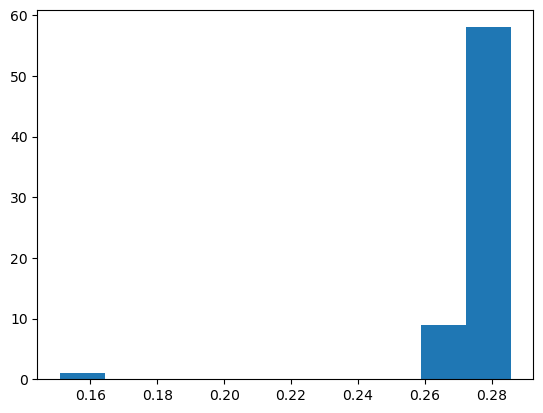

In [7]:
a = []
for i in range(path.shape[0]-1):
    a.append(path[i+1][2] - path[i][2])
plt.hist(a)
max(a), min(a)

In [21]:
import pygame
import sys
import time

# Initialize Pygame
try:
    pygame.init()

    # Set up the screen
    screen_width = 800
    screen_height = 800
    def transform(x):
        return x * screen_height
    screen = pygame.display.set_mode((screen_width, screen_height))
    pygame.display.set_caption("Moving Circle")

    # Set up colors
    BLACK = (0, 0, 0)
    WHITE = (255, 255, 255)
    GRAY = (224, 224, 224)

    # Set up the circle properties
    circle_radius = 30
    circle_x = screen_width // 2
    circle_y = screen_height // 2
    velocity_x_max = 0.2
    velocity_y_max = 0.2
    velocity_x = 2
    velocity_y = 2
    clock = pygame.time.Clock()

    # Main loop
    running = True
    for i in range(path.shape[0]):
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        # # Update circle position
        # velocity_x += pyb.random.uniform(-velocity_x_max, velocity_x_max)
        # velocity_y += pyb.random.uniform(-velocity_y_max, velocity_y_max)
        # circle_x += velocity_x #pyb.random.uniform(-velocity_x_max, velocity_x_max) + 2
        # circle_y += velocity_y #pyb.random.uniform(-velocity_y_max, velocity_y_max) + 2

        # # Bounce the circle off the walls
        # if circle_x + circle_radius > screen_width or circle_x - circle_radius < 0:
        #     velocity_x = -velocity_x 
        # if circle_y + circle_radius > screen_height or circle_y - circle_radius < 0:
        #     velocity_y = -velocity_y

        # Fill the screen with white color
        screen.fill(WHITE)

        # Draw the circle
        for obstacle in obstacles_info:
            center_x, center_y, radius = obstacle
            pygame.draw.circle(screen, GRAY, (transform(center_x), transform(center_y)), transform(radius))
        pygame.draw.circle(screen, BLACK, (transform(path[i][0]), transform(path[i][1])), transform(radius_agent))

        pygame.draw.circle(screen, (255, 0, 0), (transform(start_[0]), transform(start_[1])), transform(radius_agent))
        pygame.draw.circle(screen, (0, 0, 255), (transform(goal_[0]), transform(goal_[1])), transform(radius_agent))

        # Update the display
        pygame.display.flip()

        # Cap the frame rate
        clock.tick(15)

    # Quit Pygame
    pygame.quit()
except:
    sys.exit()

AttributeError: 'tuple' object has no attribute 'tb_frame'

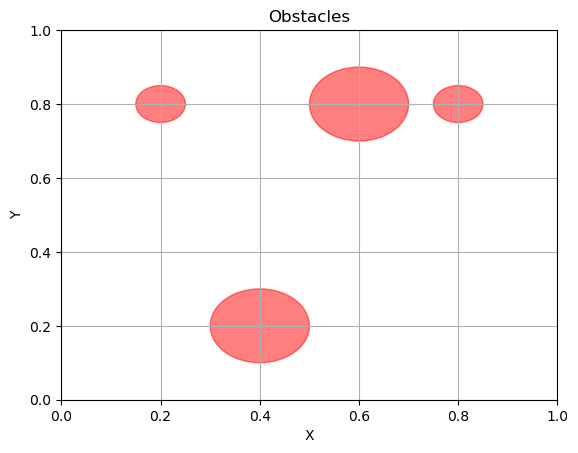

In [11]:
for obstacle in obstacles_info:
    center_x, center_y, radius = obstacle
    circle = plt.Circle((center_x, center_y), radius, color='red', alpha=0.5)
    plt.gca().add_patch(circle)

# Настройка осей
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Obstacles')
plt.grid(True)

# Отображение графика
plt.show()

In [22]:
import pygame
import sys

# Initialize Pygame
try:
    pygame.init()

    # Set up the screen
    screen_width = 800
    screen_height = 600
    screen = pygame.display.set_mode((screen_width, screen_height))
    pygame.display.set_caption("Moving Circle")

    # Set up colors
    BLACK = (0, 0, 0)
    WHITE = (255, 255, 255)

    # Set up the circle properties
    circle_radius = 30
    circle_x = screen_width // 2
    circle_y = screen_height // 2
    velocity_x_max = 0.2
    velocity_y_max = 0.2
    velocity_x = 2
    velocity_y = 2
    clock = pygame.time.Clock()

    # Main loop
    running = True
    for i in range(1000):
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        # Update circle position
        velocity_x += pyb.random.uniform(-velocity_x_max, velocity_x_max)
        velocity_y += pyb.random.uniform(-velocity_y_max, velocity_y_max)
        circle_x += velocity_x #pyb.random.uniform(-velocity_x_max, velocity_x_max) + 2
        circle_y += velocity_y #pyb.random.uniform(-velocity_y_max, velocity_y_max) + 2

        # Bounce the circle off the walls
        if circle_x + circle_radius > screen_width or circle_x - circle_radius < 0:
            velocity_x = -velocity_x 
        if circle_y + circle_radius > screen_height or circle_y - circle_radius < 0:
            velocity_y = -velocity_y

        # Fill the screen with white color
        screen.fill(WHITE)

        # Draw the circle
        pygame.draw.circle(screen, BLACK, (circle_x, circle_y), circle_radius)

        # Update the display
        pygame.display.flip()

        # Cap the frame rate
        clock.tick(60)

    # Quit Pygame
    pygame.quit()
except:
    sys.exit()


## 3 

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define obstacle function
def isStateValid(state):
    # Dummy collision checking function with rectangular obstacles
    x = state[0]
    y = state[1]

    # Define obstacle positions and dimensions
    obstacles = [(2, 2, 2, 6), (6, 6, 4, 2)]

    # Check collision with obstacles
    for obstacle in obstacles:
        if obstacle[0] <= x <= obstacle[0] + obstacle[2] and obstacle[1] <= y <= obstacle[1] + obstacle[3]:
            return False  # Collision detected
    return True  # No collision

# Visualize the obstacles
def visualizeObstacles():
    obstacles = [(2, 2, 2, 6), (6, 6, 4, 2)]
    for obstacle in obstacles:
        plt.fill([obstacle[0], obstacle[0], obstacle[0] + obstacle[2], obstacle[0] + obstacle[2]],
                 [obstacle[1], obstacle[1] + obstacle[3], obstacle[1] + obstacle[3], obstacle[1]],
                 'k')

# Visualize the path
def visualizePath(path):
    # Extract states from the path
    states = path.getStates()

    # Extract x and y coordinates from states
    x_values = [states[i][0] for i in range(len(states))]
    y_values = [states[i][1] for i in range(len(states))]

    # Plot the path
    plt.plot(x_values, y_values, '-r', label='Path')
    plt.plot(start[0], start[1], 'bo', label='Start')
    plt.plot(goal[0], goal[1], 'go', label='Goal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Path Planning with OMPL')
    plt.legend()
    plt.grid(True)
    plt.axis([0, 10, 0, 10])
    plt.gca().set_aspect('equal', adjustable='box')
    visualizeObstacles()
    plt.show()

# Check if a solution is found
if solved:
    # Get the solution path
    path = ss.getSolutionPath()
    path.interpolate(100)  # Interpolate path for smoother visualization
    print("Solution found:")
    path.printAsMatrix()

    # Visualize the path
    visualizePath(path)
else:
    print("No solution found")


NameError: name 'solved' is not defined

Debug:   RRTstar: Planner range detected to be 0.282843
Info:    RRTstar: No optimization objective specified. Defaulting to optimizing path length for the allowed planning time.
Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 25
Info:    RRTstar: Found an initial solution with a cost of 1.33 in 67 iterations (36 vertices in the graph)
Info:    RRTstar: Created 853 new states. Checked 165552 rewire options. 1 goal states in tree. Final solution cost 1.300
Info:    Solution found in 1.010036 seconds


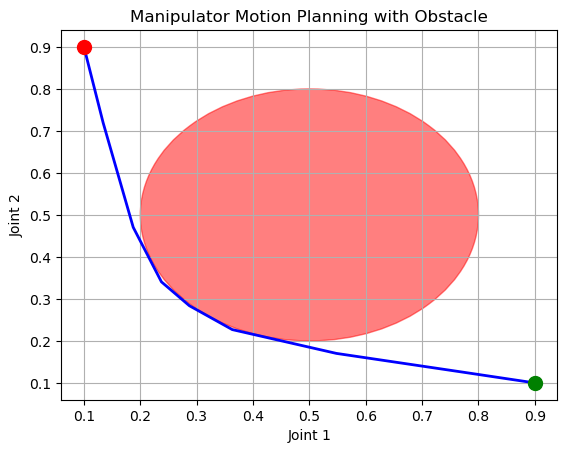

In [22]:
from ompl import base as ob
from ompl import geometric as og
import matplotlib.pyplot as plt
import numpy as np

# Define a function to check state validity (collision checking)
def isStateValid(state):
    # Dummy collision checking function (replace with actual collision checking)
    # Here, we define a circular obstacle centered at (0.5, 0.5) with radius 0.3
    x = state[0]
    y = state[1]
    obstacle_center = pyb.array([0.5, 0.5])
    obstacle_radius = 0.3
    if pyb.linalg.norm(pyb.array([x, y]) - obstacle_center) < obstacle_radius:
        return False  # Invalid state if inside obstacle
    else:
        return True   # Valid state otherwise

# Create the state space for the manipulator (joint space)
space = ob.RealVectorStateSpace(2)  # Example: 2 joint manipulator
bounds = ob.RealVectorBounds(2)     # Define bounds for each joint
bounds.setLow(0)                    # Example: Lower bound for each joint
bounds.setHigh(1)                   # Example: Upper bound for each joint
space.setBounds(bounds)

# Create a SimpleSetup object
ss = og.SimpleSetup(space)

# Set the state validity checker
ss.setStateValidityChecker(ob.StateValidityCheckerFn(isStateValid))

# Define the start and goal states
start = ob.State(space)
start()[0] = 0.1  # Example: Start configuration for joint 1
start()[1] = 0.9  # Example: Start configuration for joint 2

goal = ob.State(space)
goal()[0] = 0.9  # Example: Goal configuration for joint 1
goal()[1] = 0.1  # Example: Goal configuration for joint 2

# Set the start and goal states
ss.setStartAndGoalStates(start, goal)

# Set the planner (RRT)
planner = og.RRTstar(ss.getSpaceInformation())
ss.setPlanner(planner)

# Attempt to solve the problem
if ss.solve(1.0):
    # Get the solution path
    path = ss.getSolutionPath()

    # Visualize the path
    fig = plt.figure()
    ax = fig.add_subplot(111)
    path.interpolate(100)
    states = path.getStates()
    x = [state[0] for state in states]
    y = [state[1] for state in states]
    ax.plot(x, y, 'b-', linewidth=2)
    
    # Plot the obstacle
    circle = plt.Circle((0.5, 0.5), 0.3, color='r', alpha=0.5)
    ax.add_artist(circle)
    
    ax.plot(start()[0], start()[1], 'ro', markersize=10)
    ax.plot(goal()[0], goal()[1], 'go', markersize=10)
    plt.xlabel('Joint 1')
    plt.ylabel('Joint 2')
    plt.title('Manipulator Motion Planning with Obstacle')
    plt.grid(True)
    plt.show()
else:
    print("No solution found")


## Pybullet

In [11]:
import pybullet as pyb
pyb.connect(pyb.GUI)
pyb.setGravity(0, 0, -9.8)

robot_id0 = pyb.loadURDF("xarm6.urdf", [0, 0, 0])
robot_id1 = pyb.loadURDF("xarm6.urdf", [1, 0, 0])
robot_id2 = pyb.loadURDF("xarm6.urdf", [1, 1, 0])
robot_id3 = pyb.loadURDF("xarm6.urdf", [0, 1, 0])
robot_id4 = pyb.loadURDF("xarm6.urdf", [0.2, 0.2, 0])

startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Mesa
GL_RENDERER=llvmpipe (LLVM 15.0.7, 256 bits)
GL_VERSION=4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
GL_SHADING_LANGUAGE_VERSION=4.50
pthread_getconcurrency()=0
Version = 4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
Vendor = Mesa
Renderer = llvmpipe (LLVM 15.0.7, 256 bits)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity lo

pybullet build time: Nov 28 2023 23:52:03


b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frame
b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: link_eef
b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frame
b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: link_eef
b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frame
b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: link_eef


In [10]:
!pip3.9 install pybullet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 3.7 MB/s eta 0:00:0000:0100:01


In [15]:
import time
for i in range(1000):

    joint_positions1 = np.random.uniform(0, 2*np.pi, 8)
    for joint_index in range(pyb.getNumJoints(robot_id1)):
        pyb.resetJointState(robot_id1, joint_index, joint_positions1[joint_index])

    joint_positions2 = np.random.uniform(0, 2*np.pi, 8)
    for joint_index in range(pyb.getNumJoints(robot_id2)):
        pyb.resetJointState(robot_id2, joint_index, joint_positions2[joint_index])

    joint_positions3 = np.random.uniform(0, 2*np.pi, 8)
    for joint_index in range(pyb.getNumJoints(robot_id3)):
        pyb.resetJointState(robot_id3, joint_index, joint_positions3[joint_index])

    joint_positions0 = np.random.uniform(0, 2*np.pi, 8)
    for joint_index in range(pyb.getNumJoints(robot_id0)):
        pyb.resetJointState(robot_id0, joint_index, joint_positions0[joint_index])
    
    joint_positions4 = np.random.uniform(0, 2*np.pi, 8)
    for joint_index in range(pyb.getNumJoints(robot_id4)):
        pyb.resetJointState(robot_id4, joint_index, joint_positions4[joint_index])

    time.sleep(1.0 / 240.0) 

In [240]:
joint_positions0 = pyb.random.uniform(0, 2*pyb.pi, 8)
for joint_index in range(pyb.getNumJoints(robot_id0)):
    pyb.resetJointState(robot_id0, joint_index, joint_positions0[joint_index])

joint_positions4 = pyb.random.uniform(0, 2*pyb.pi, 8)/2
for joint_index in range(pyb.getNumJoints(robot_id4)):
    pyb.resetJointState(robot_id4, joint_index, joint_positions0[joint_index]/2)
pyb.getContactPoints(bodyA=robot_id0, bodyB=robot_id4)

()

In [414]:
end_effector_link_index = 7

# Set the target position and orientation of the end-effector
target_position = [1, -0.4, 0.4]
target_orientation = pyb.getQuaternionFromEuler([0.1, 0.5*pyb.pi, -0.4*pyb.pi])  # No rotation

# Set the IK parameters
ik_solver = pyb.IK_DLS  # Differential inverse kinematics (DLS) solver
max_iterations = 1000  # Maximum iterations
tolerance = 1e-5  # Tolerance for convergence

# Calculate inverse kinematics
joint_positions = pyb.calculateInverseKinematics(robot_id1, end_effector_link_index, target_position, target_orientation,
                                               solver=ik_solver, maxNumIterations=max_iterations, residualThreshold=tolerance)
print(len(joint_positions), joint_positions)
for joint_index in range(len(joint_positions)):
    pyb.resetJointState(robot_id1, joint_index+1, joint_positions[joint_index])


6 (3.910668450490025, -4.723550724215722, 2.3057760045261766, -1.1060942691881692, 4.302250545072415, 5.62532855871446)


In [300]:
joint_positions = [4.712391775260053+20, 5.131099263675217, 3.5500010378218807+0.9, 1.0268542228042466e-07, 0.7270327769862606 + 0.3, -1.570799258965113-1.4, 0.2, 0.5]
for joint_index in range(pyb.getNumJoints(robot_id1)):
    pyb.resetJointState(robot_id1, joint_index, joint_positions[joint_index])

In [303]:
help(pyb.getNumJoints)

Help on built-in function getNumJoints in module pybullet:

getNumJoints(...)
    Get the number of joints for an object.



In [16]:
pyb.disconnect()

numActiveThreads = 0
stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed


In [1]:
import numpy as np
import time
from os.path import abspath, dirname, join
import sys
import math
try:
    from ompl import util as ou
    from ompl import base as ob
    from ompl import geometric as og
except ImportError:
    sys.path.insert(0, join(dirname(dirname(abspath(__file__))), 'py-bindings'))
    from ompl import util as ou
    from ompl import base as ob
    from ompl import geometric as og
from functools import partial
import pygame
import sys
import numpy as np

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
%time

start_ = [2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0] # первая и последняя не в счет, 2-7 конфигурация робота, углы в радианах [-pyb.pi, pyb.i]
goal_ =  [2.0, 1.0, 2.0, 3.0, 0.5, -1.0, -1.4, 2.0]

T_max = 20
N_max = 1000
dt = T_max / N_max


def isStateValid(spaceInformation, state):
    p = state[0][0] 
    t = spaceInformation.getStateSpace().getStateTime(state)
    valid = True
    # for obstacle in obstacles_info:
    #    x, y = get_xy(t, trajectories, obstacle)
    #    circle_radius = obstacles_info[obstacle]
    #    valid *= ((state[0][0] - x)**2 + (state[0][1] - y)**2 > (circle_radius + radius_agent + 0.1)**2)
    #    if not valid:
    #       return False
    return t >= 0 and p < math.inf and valid

class SpaceTimeMotionValidator(ob.MotionValidator):
    def checkMotion(self, s1, s2):
      if not si.isValid(s2):
        return False
      delta_pos = si.getStateSpace().distanceSpace(s1, s2)
      # delta_t = si.getStateSpace().distanceTime(s1, s2)
      t1 = si.getStateSpace().getStateTime(s1)
      t2 = si.getStateSpace().getStateTime(s2)
      delta_t = t2 - t1
      if delta_t <= 0:
        return False
      if (delta_pos / delta_t) > si.getStateSpace().getVMax() :
        return False
      return True
    

vMax = 0.2
vector_space = ob.RealVectorStateSpace(8)
bounds = ob.RealVectorBounds(8)
bounds.setLow(-pyb.pi)
bounds.setHigh(pyb.pi)
vector_space.setBounds(bounds)

space = ob.SpaceTimeStateSpace(vector_space, vMax) 
space.setTimeBounds(0.0, 100);

si = ob.SpaceInformation(space)
si.setMotionValidator(SpaceTimeMotionValidator(si))
si.setStateValidityChecker(ob.StateValidityCheckerFn( \
    partial(isStateValid, si)))

pdef = ob.ProblemDefinition(si)


start = ob.State(space)
goal = ob.State(space)
for i in range(len(start_)):
    start()[0][i] = start_[i]
    goal()[0][i]  = goal_[i]

pdef.setStartAndGoalStates(start, goal)

strrt = og.STRRTstar(si)
strrt.setRange(vMax)
strrt.setProblemDefinition(pdef)
strrt.setup()

result = strrt.solve(1.0)
print("Done planning.")

if result:
  print("Found path of length", pdef.getSolutionPath().length())
  print("Path:", pdef.getSolutionPath().printAsMatrix())
else:
  print("No solution found.")


CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 2.86 µs
Info:    SpaceTimeRRT: Space information setup was not yet called. Calling now.
Info:    SpaceTimeRRT: Starting planning with 1 states already in datastructure
Info:    SpaceTimeRRT: Starting planning with time bound factor 2.00
Done planning.Info:    SpaceTimeRRT: Created 1425 states (679 start + 746 goal)

Found path of length 29.500325994531316
Path: 2 0 0 0 0 0 0 2 0 
1.97859 -0.0370927 -0.00130202 0.0155895 0.00452255 0.0219539 -0.00386918 1.95876 0.334447 
1.99027 -0.0196477 0.0255482 0.0156585 0.00261232 0.0241611 0.020693 1.92054 0.677581 
1.99028 -0.0139151 0.0365072 0.0322242 0.00526662 0.0187425 0.0126982 1.92089 1.05461 
1.99029 -0.00818239 0.0474663 0.0487899 0.00792091 0.0133239 0.00470341 1.92124 1.43163 
1.99031 -0.00244974 0.0584254 0.0653556 0.0105752 0.00790523 -0.00329139 1.92158 1.80866 
1.99032 0.00328292 0.0693844 0.0819212 0.0132295 0.00248662 -0.0112862 1.92193 2.18568 
1.99034 0.00901558 0.080

In [3]:
import numpy as np
def parse_path(data_str):
    lines = data_str.split('\n')
    table = []
    for line in lines:
        if line.strip():
            row = [float(num) for num in line.split()]
            table.append(row)
    return pyb.array(table)

In [ ]:
def parse_path(data_str):
    lines = data_str.split('\n')
    table = []
    for line in lines:
        if line.strip():
            row = [float(num) for num in line.split()]
            table.append(row)
    return pyb.array(table)
path = parse_path(pdef.getSolutionPath().printAsMatrix())
path.shape

import matplotlib.pyplot as plt
from scipy import interpolate
array = pyb.array(path)

interp = []
for i in range(array.shape[1]-1):
    interp_x = interpolate.interp1d(array[:, -1], array[:, i], kind='linear', fill_value='extrapolate')
    interpyb.append(interp_x)

time_grid = pyb.arange(0, 100, 100/1000)

# Interpolate x and y coordinates onto the time grid
grid_data = []
for i in interp:
    grid_data.append(i(time_grid))

# Combine x and y grids into a single array
interpolated_array = pyb.column_stack((grid_data[0], grid_data[1], grid_data[2], grid_data[3], grid_data[4], grid_data[5], grid_data[6], grid_data[7], time_grid))
print(interpolated_array.shape)
for i in range(len(interpolated_array)):
    if interpolated_array[i][-1] > array[-1][-1]:
        for j in range(len(interpolated_array[i])-1):        
            interpolated_array[i][j] = path[-1][j]


In [4]:
path = parse_path(pdef.getSolutionPath().printAsMatrix())
path.shape

(149, 9)

In [474]:
del time
import time

In [20]:
data = path
for configuration in data:
    for joint_index in range(pyb.getNumJoints(robot_id0)):
        pyb.resetJointState(robot_id0, joint_index, configuration[joint_index])
    time.sleep(2.0 / 240.0) 

In [21]:
data = interpolated_array
for configuration in data:
    for joint_index in range(pyb.getNumJoints(robot_id0)):
        pyb.resetJointState(robot_id0, joint_index, configuration[joint_index])
    time.sleep(2.0 / 240.0) 

In [22]:
pyb.disconnect()

numActiveThreads = 0
stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed


In [1]:
TIMESTEP = 1.0 / 60

import numpy as np
import pybullet as pyb
import pybullet_data
import pyb_utils
import time

def load_environment(client_id):
    pyb.setTimeStep(TIMESTEP, physicsClientId=client_id)
    pyb.setAdditionalSearchPath(
        pybullet_data.getDataPath(), physicsClientId=client_id
    )

    # ground plane
    ground_id = pyb.loadURDF(
        "plane.urdf", [0, 0, 0], useFixedBase=True, physicsClientId=client_id
    )

    # KUKA iiwa robot arm
    kuka_id = pyb.loadURDF(
        "kuka_iiwa/model.urdf",
        [0, 0, 0],
        useFixedBase=True,
        physicsClientId=client_id,
        flags=pyb.URDF_USE_SELF_COLLISION
    )

    kuka_id_1 = pyb.loadURDF(
        "kuka_iiwa/model.urdf",
        [0, 0.5, 0],
        useFixedBase=True,
        physicsClientId=client_id,
    )
    robot = pyb_utils.Robot(kuka_id, client_id=client_id)

    # some cubes for obstacles
    cube1_id = pyb.loadURDF(
        "cube.urdf", [1, 1, 0.5], useFixedBase=True, physicsClientId=client_id
    )
    cube2_id = pyb.loadURDF(
        "cube.urdf", [-1, -1, 0.5], useFixedBase=True, physicsClientId=client_id
    )
    cube3_id = pyb.loadURDF(
        "cube.urdf", [1, -1, 0.5], useFixedBase=True, physicsClientId=client_id
    )

    # store body indices in a dict with more convenient key names
    obstacles = {
        "ground": ground_id,
        "cube1": cube1_id,
        "cube2": cube2_id,
        "cube3": cube3_id,
        "kuka_1":kuka_id_1
    }
    return robot, obstacles


def create_robot_params_gui(robot):
    """Create debug params to set the robot joint positions from the GUI."""
    params = {}
    for name in robot.moveable_joint_names:
        params[name] = pyb.addUserDebugParameter(
            name,
            rangeMin=-2 * np.pi,
            rangeMax=2 * np.pi,
            startValue=0,
            physicsClientId=robot.client_id,
        )
    return params


def read_robot_params_gui(robot_params_gui, client_id):
    """Read robot configuration from the GUI."""
    return np.array(
        [
            pyb.readUserDebugParameter(
                param,
                physicsClientId=client_id,
            )
            for param in robot_params_gui.values()
        ]
    )


def main():

    # main simulation server, with a GUI
    gui_id = pyb.connect(pyb.GUI)

    # simulation server only used for collision detection
    col_id = pyb.connect(pyb.DIRECT)

    # add bodies to both of the environments
    robot, _ = load_environment(gui_id)
    col_robot, col_obstacles = load_environment(col_id)

    # create user debug parameters
    collision_margin_param_gui = pyb.addUserDebugParameter(
        "collision_margin",
        rangeMin=0,
        rangeMax=0.2,
        startValue=0.01,
        physicsClientId=gui_id,
    )
    robot_params_gui = create_robot_params_gui(robot)

    # define bodies (and links) to use for shortest distance computations and
    # collision checking
    ground = col_obstacles["ground"]
    cube1 = col_obstacles["cube1"]
    cube2 = col_obstacles["cube2"]
    cube3 = col_obstacles["cube3"]
    kuka1 = col_obstacles["kuka_1"]
    link7 = (col_robot.uid, "lbr_iiwa_link_7")
    link6 = (col_robot.uid, "lbr_iiwa_link_6")
    link5 = (col_robot.uid, "lbr_iiwa_link_5")
    link4 = (col_robot.uid, "lbr_iiwa_link_4")
    link3 = (col_robot.uid, "lbr_iiwa_link_3")

    col_detector = pyb_utils.CollisionDetector(
        col_id,
        [(link7, ground), (link7, cube1), (link7, cube2), (link7, cube3), (link7, kuka1),  \
         (link6, ground), (link6, cube1), (link6, cube2), (link6, cube3), (link6, kuka1), \
            (link5, ground), (link5, cube1), (link5, cube2), (link5, cube3), (link5, kuka1),\
                (link4, ground), (link4, cube1), (link4, cube2), (link4, cube3), (link4, kuka1), \
                    (link3, ground), (link3, cube1), (link3, cube2), (link3, cube3), (link3, kuka1)],
    )

    last_dists = 0

    while True:
        q = read_robot_params_gui(robot_params_gui, client_id=gui_id)

        # move to the requested configuration if it is not in collision,
        # otherwise display a warning
        # the key is that we can check collisions using the separate physics
        # client, so we don't have to set the robot to a configuration in the
        # main GUI sim to check if that configuration is in collision
        col_robot.reset_joint_configuration(q)
        if not col_detector.in_collision(
            margin=pyb.readUserDebugParameter(collision_margin_param_gui),
        ):
            robot.reset_joint_configuration(q)
        else:
            pyb.addUserDebugText(
                "Avoiding collision",
                textPosition=[0, 0, 1.5],
                textColorRGB=[1, 0, 0],
                textSize=2,
                lifeTime=0.2,
            )

        # compute shortest distances for user-selected configuration
        dists = col_detector.compute_distances()
        if not np.allclose(last_dists, dists):
            print(f"Distance to obstacles = {dists}")
            last_dists = dists

        time.sleep(TIMESTEP)


if __name__ == "__main__":
    main()

pybullet build time: Nov 28 2023 23:45:17


startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Mesa
GL_RENDERER=llvmpipe (LLVM 15.0.7, 256 bits)
GL_VERSION=4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
GL_SHADING_LANGUAGE_VERSION=4.50
pthread_getconcurrency()=0
Version = 4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
Vendor = Mesa
Renderer = llvmpipe (LLVM 15.0.7, 256 bits)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = Mesa
ven = Mesa
Distance to obstacles = [1.25009997 0.70513402 0.70499405 0.70501945 0.35746522 1.09252825
 0.65223816 0.65030505 0.65050021 0.33216408 0.95349985 0.63825

: 

In [ ]:
pyb.disconnect()

In [26]:
TIMESTEP = 1.0 / 60

def load_environment(client_id):
    # ground plane
    ground_id = pyb.loadURDF(
        "plane.urdf", [0, 0, 0], useFixedBase=True, physicsClientId=client_id
    )
    # KUKA iiwa robot arm
    kuka_id = pyb.loadURDF(
        "kuka_iiwa/model.urdf",
        [0, 0, 0],
        useFixedBase=True,
        physicsClientId=client_id,
        flags=pyb.URDF_USE_SELF_COLLISION
    )

    kuka_id_1 = pyb.loadURDF(
        "kuka_iiwa/model.urdf",
        [0, 0.5, 0],
        useFixedBase=True,
        physicsClientId=client_id,
    )
    robot = pyb_utils.Robot(kuka_id, client_id=client_id)

    # some cubes for obstacles
    cube1_id = pyb.loadURDF(
        "cube.urdf", [1, 1, 0.5], useFixedBase=True, physicsClientId=client_id
    )
    cube2_id = pyb.loadURDF(
        "cube.urdf", [-1, -1, 0.5], useFixedBase=True, physicsClientId=client_id
    )
    cube3_id = pyb.loadURDF(
        "cube.urdf", [1, -1, 0.5], useFixedBase=True, physicsClientId=client_id
    )

    # store body indices in a dict with more convenient key names
    obstacles = {
        "ground": ground_id,
        "cube1": cube1_id,
        "cube2": cube2_id,
        "cube3": cube3_id,
        "kuka_1":kuka_id_1
    }
    return robot, obstacles


def create_robot_params_gui(robot):
    """Create debug params to set the robot joint positions from the GUI."""
    params = {}
    for name in robot.moveable_joint_names:
        params[name] = pyb.addUserDebugParameter(
            name,
            rangeMin=-2 * pyb.pi,
            rangeMax=2 * pyb.pi,
            startValue=0,
            physicsClientId=robot.client_id,
        )
    return params


def read_robot_params_gui(robot_params_gui, client_id):
    """Read robot configuration from the GUI."""
    return pyb.array(
        [
            pyb.readUserDebugParameter(
                param,
                physicsClientId=client_id,
            )
            for param in robot_params_gui.values()
        ]
    )


def main():

    # main simulation server, with a GUI
    gui_id = pyb.connect(pyb.GUI)

    # simulation server only used for collision detection
    col_id = pyb.connect(pyb.DIRECT)

    # add bodies to both of the environments
    robot, _ = load_environment(gui_id)
    col_robot, col_obstacles = load_environment(col_id)

    # create user debug parameters
    collision_margin_param_gui = pyb.addUserDebugParameter(
        "collision_margin",
        rangeMin=0,
        rangeMax=0.2,
        startValue=0.01,
        physicsClientId=gui_id,
    )
    robot_params_gui = create_robot_params_gui(robot)

    # define bodies (and links) to use for shortest distance computations and
    # collision checking
    ground = col_obstacles["ground"]
    cube1 = col_obstacles["cube1"]
    cube2 = col_obstacles["cube2"]
    cube3 = col_obstacles["cube3"]
    kuka1 = col_obstacles["kuka_1"]
    link7 = (col_robot.uid, "lbr_iiwa_link_7")
    link6 = (col_robot.uid, "lbr_iiwa_link_6")
    link5 = (col_robot.uid, "lbr_iiwa_link_5")
    link4 = (col_robot.uid, "lbr_iiwa_link_4")
    link3 = (col_robot.uid, "lbr_iiwa_link_3")

    col_detector = pyb_utils.CollisionDetector(
        col_id,
        [(link7, ground), (link7, cube1), (link7, cube2), (link7, cube3), (link7, kuka1),  \
         (link6, ground), (link6, cube1), (link6, cube2), (link6, cube3), (link6, kuka1), \
            (link5, ground), (link5, cube1), (link5, cube2), (link5, cube3), (link5, kuka1),\
                (link4, ground), (link4, cube1), (link4, cube2), (link4, cube3), (link4, kuka1), \
                    (link3, ground), (link3, cube1), (link3, cube2), (link3, cube3), (link3, kuka1)],
    )

    last_dists = 0

    while True:
        q = read_robot_params_gui(robot_params_gui, client_id=gui_id)

        # move to the requested configuration if it is not in collision,
        # otherwise display a warning
        # the key is that we can check collisions using the separate physics
        # client, so we don't have to set the robot to a configuration in the
        # main GUI sim to check if that configuration is in collision
        col_robot.reset_joint_configuration(q)
        if not col_detector.in_collision(
            margin=pyb.readUserDebugParameter(collision_margin_param_gui),
        ):
            robot.reset_joint_configuration(q)
        else:
            pyb.addUserDebugText(
                "Avoiding collision",
                textPosition=[0, 0, 1.5],
                textColorRGB=[1, 0, 0],
                textSize=2,
                lifeTime=0.2,
            )

        # compute shortest distances for user-selected configuration
        dists = col_detector.compute_distances()
        if not pyb.allclose(last_dists, dists):
            print(f"Distance to obstacles = {dists}")
            last_dists = dists

        time.sleep(TIMESTEP)


if __name__ == "__main__":
    main()

startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Mesa
GL_RENDERER=llvmpipe (LLVM 15.0.7, 256 bits)
GL_VERSION=4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
GL_SHADING_LANGUAGE_VERSION=4.50
pthread_getconcurrency()=0
Version = 4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
Vendor = Mesa
Renderer = llvmpipe (LLVM 15.0.7, 256 bits)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = Mesa
ven = Mesa


NameError: name 'pyb_utils' is not defined

: 

In [ ]:
import time

import numpy as np
import pybullet as pyb
import pybullet_data

import pyb_utils

# Инициализация симуляции
pyb.connect(pyb.DIRECT)

gui_id = pyb.connect(pyb.DIRECT)
pyb.setAdditionalSearchPath(
        pybullet_data.getDataPath(), physicsClientId=gui_id
    )
kuka_id = pyb.loadURDF(
    "kuka_iiwa/model.urdf",
    [0, 0, 0],
    useFixedBase=True,
    physicsClientId=gui_id,
    flags=pyb.URDF_USE_SELF_COLLISION
)

# Создание объектов
box_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=[0.5, 0.5, 0.5])
sphere_id = pyb.createCollisionShape(pyb.GEOM_SPHERE, radius=0.5)

# Создание тел
box_body_id = pyb.createMultiBody(baseCollisionShapeIndex=box_id, basePosition=[0, 0, 0])
sphere_body_id = pyb.createMultiBody(baseCollisionShapeIndex=sphere_id, basePosition=[1.1, 0, 0])


for i in range(1000):
# Проверка коллизий
    contacts = pyb.getClosestPoints(box_body_id, sphere_body_id, distance=0.0)
    if contacts:
        a = 1
        print('contact')
    else:
        a = 2
        print('no contact')
pyb.disconnect()

pybullet build time: Nov 28 2023 23:45:17


no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact
no contact

In [7]:
# Инициализация симуляции
pyb.connect(pyb.DIRECT)

# Загрузка робота

client_id = 1

# ground_id = pyb.loadURDF(
#     "plane.urdf", [0, 0, 0], useFixedBase=True, physicsClientId=client_id
# )

# # KUKA iiwa robot arm
# kuka_id = pyb.loadURDF(
#     "kuka_iiwa/model.urdf",
#     [0, 0, 0],
#     useFixedBase=True,
#     physicsClientId=client_id,
#     flags=pyb.URDF_USE_SELF_COLLISION
# )
robot_urdf_path = "kuka_iiwa/model.urdf" #"xarm6.urdf"
robot_id = pyb.loadURDF(robot_urdf_path, [0, 0, 0])

# Проверка коллизий для частей робота
for link_index in range(pyb.getNumJoints(robot_id)):
    contacts = pyb.getContactPoints(robot_id, -1, link_index)
    if contacts:
        print(f"Collision occurred for link {link_index}!")
    else:
        print(f"No collision for link {link_index}.")


No collision for link 0.
No collision for link 1.
No collision for link 2.
No collision for link 3.
No collision for link 4.
No collision for link 5.
No collision for link 6.


In [4]:
import pybullet as pyb
import pybullet_data

server_id = pyb.connect(pyb.DIRECT)
pyb.setAdditionalSearchPath(pybullet_data.getDataPath(), physicsClientId=server_id)

# Загрузка основного робота
robot_urdf_path = "kuka_iiwa/model.urdf"
robot_id = pyb.loadURDF(robot_urdf_path, [0, 0, 0])

# Создание объектов в виде кубиков
cube1_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=[0.5, 0.5, 0.5])
cube2_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=[0.5, 0.5, 0.5])


cube1_position = [1, 0, 0]
cube2_position = [0, 1, 0]

# Создание тел объектов
cube1_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube1_id, basePosition=cube1_position)
cube2_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube2_id, basePosition=cube2_position)

# Проверка коллизий для каждой части робота
for link_index in range(pyb.getNumJoints(robot_id)):
    contacts = pyb.getContactPoints(robot_id, -1, link_index)
    if contacts:
        print(f"Collision occurred for link {link_index} with another robot or object!")
    else:
        print(f"No collision for link {link_index}.")

# Проверка коллизий для каждого кубика
contacts_cube1 = pyb.getClosestPoints(robot_id, cube1_body_id, distance=0.0)
if contacts_cube1:
    print("Collision occurred between the robot and cube1!")
else:
    print("No collision between the robot and cube1.")

contacts_cube2 = pyb.getClosestPoints(robot_id, cube2_body_id, distance=0.0)
if contacts_cube2:
    print("Collision occurred between the robot and cube2!")
else:
    print("No collision between the robot and cube2.")


pyb.disconnect()

No collision for link 0.
No collision for link 1.
No collision for link 2.
No collision for link 3.
No collision for link 4.
No collision for link 5.
No collision for link 6.
No collision between the robot and cube1.
No collision between the robot and cube2.


In [6]:
import numpy as np
from os.path import abspath, dirname, join
import sys
try:
    from ompl import util as ou
    from ompl import base as ob
    from ompl import geometric as og
except ImportError:
    sys.path.insert(0, join(dirname(dirname(abspath(__file__))), 'py-bindings'))
    from ompl import util as ou
    from ompl import base as ob
    from ompl import geometric as og
from functools import partial

import pybullet as pyb
import pybullet_data


import numpy as np
def calculate_cube_coordinates(t):
    """
    Функция, которая вычисляет координаты фигур в пространстве в заданный момент времени.

    Аргументы:
    - current_time (float): Текущее время, для которого нужно вычислить координаты фигур.

    Возвращает:
    - coordinates (Dict[str, Any]): Словарь, в котором ключи представляют имена фигур, а значения - их координаты в формате [x, y, z].
    """
    num_cubes = 4    # Параметры для закона движения
    A = 0.5  # Амплитуда движения по x и y
    B = 0.35  # Амплитуда движения по z
    w = 0.1  # Частота движения
    coord = []
    for i in range(1, num_cubes + 1):
        x = A * np.cos(w * t + np.pi/2*i)
        y = A * np.sin(w * t + np.pi/2*i)
        z = B + B * np.cos(w * t)
        coord.append([x, y, z])
    return coord


start_ = np.zeros(7)
goal_ =  np.array([np.pi/2, np.pi/2, 0, 0, 0, 0, 0])

def isStateValid(spaceInformation, state):
    t = spaceInformation.getStateSpace().getStateTime(state)
    server_id = pyb.connect(pyb.DIRECT)
    pyb.setAdditionalSearchPath(pybullet_data.getDataPath(), physicsClientId=server_id)
    robot_id = pyb.loadURDF("kuka_iiwa/model.urdf", [0, 0, 0])
    # pyb.disconnect()
    # return True
    for joint_index in range(pyb.getNumJoints(robot_id)):
        joint_angle = state[0][joint_index]
        pyb.resetJointState(robot_id, joint_index, joint_angle)  

    cubes_coord = calculate_cube_coordinates(t)
    num_cubes = len(cubes_coord)
    cube_ids = []
    init_positions = []
    for i in range(num_cubes):
      cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=[0.15, 0.15, 0.75])
      cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=[0.15, 0.15, 0.75], rgbaColor=[i, 0, 0, 1])
      init_position = cubes_coord[i] 
      cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_position)
      cube_ids.append(cube_body_id)
      init_positions.append(init_position)    
    
    # Проверка коллизий для каждой части робота
    for link_index in range(pyb.getNumJoints(robot_id)):
        contacts = pyb.getContactPoints(robot_id, -1, link_index)
        if contacts:
          pyb.disconnect()
          return False

    for i in range(len(cube_ids)):
      contacts_cube1 = pyb.getClosestPoints(robot_id, cube_ids[i], distance=0.0)
      if contacts_cube1:
        pyb.disconnect()
        return False
    pyb.disconnect()
    return True

class SpaceTimeMotionValidator(ob.MotionValidator):
    def checkMotion(self, s1, s2):
      if not si.isValid(s2):
        return False
      delta_pos = si.getStateSpace().distanceSpace(s1, s2)
      # delta_t = si.getStateSpace().distanceTime(s1, s2)
      t1 = si.getStateSpace().getStateTime(s1)
      t2 = si.getStateSpace().getStateTime(s2)
      delta_t = t2 - t1
      if delta_t <= 0:
        return False
      if (delta_pos / delta_t) > si.getStateSpace().getVMax() :
        return False
      return True
    

vMax = 0.4
vector_space = ob.RealVectorStateSpace(7)
bounds = ob.RealVectorBounds(7)
for i in range(len(start_)):   
  bounds.setLow(i, -np.pi)
  bounds.setHigh(i, np.pi)
vector_space.setBounds(bounds)

space = ob.SpaceTimeStateSpace(vector_space, vMax) 
space.setTimeBounds(0.0, 120);

si = ob.SpaceInformation(space)
si.setMotionValidator(SpaceTimeMotionValidator(si))
si.setStateValidityChecker(ob.StateValidityCheckerFn( \
    partial(isStateValid, si)))

pdef = ob.ProblemDefinition(si)


start = ob.State(space)
goal = ob.State(space)
for i in range(len(start_)):
    start()[0][i] = start_[i]
    goal()[0][i]  = goal_[i]

pdef.setStartAndGoalStates(start, goal)

strrt = og.STRRTstar(si)
strrt.setRange(vMax)
strrt.setProblemDefinition(pdef)
strrt.setup()

result = strrt.solve(20.0)
print("Done planning.")

if result:
  print("Found path of length", pdef.getSolutionPath().length())
  print("Path:", pdef.getSolutionPath().printAsMatrix())
else:
  print("No solution found.")

Info:    SpaceTimeRRT: Space information setup was not yet called. Calling now.
Info:    SpaceTimeRRT: Starting planning with 1 states already in datastructure
Info:    SpaceTimeRRT: Starting planning with time bound factor 2.00
Done planning.Info:    SpaceTimeRRT: Created 283 states (105 start + 178 goal)

Found path of length 13.076193780840915
Path: 0 0 0 0 0 0 0 0 
-0.0933699 0.105317 -0.0325274 -0.111983 -0.0941046 0.00211958 -0.0697714 0.582892 
-0.0752364 0.120049 -0.0313833 -0.110243 -0.093343 0.002293 -0.0687189 1.3594 
-0.0571029 0.13478 -0.0302392 -0.108503 -0.0925815 0.00246641 -0.0676663 2.13591 
-0.0389695 0.149511 -0.0290951 -0.106764 -0.0918199 0.00263982 -0.0666137 2.91241 
-0.020836 0.164242 -0.027951 -0.105024 -0.0910583 0.00281324 -0.0655612 3.68892 
-0.00270254 0.178974 -0.0268069 -0.103284 -0.0902967 0.00298665 -0.0645086 4.46543 
0.0154309 0.193705 -0.0256628 -0.101544 -0.0895351 0.00316006 -0.0634561 5.24194 
0.0335644 0.208436 -0.0245187 -0.0998045 -0.0887735 0

In [7]:
help(strrt.solve)

Help on method solve:

solve(...) method of ompl.geometric._geometric.STRRTstar instance
    solve( (STRRTstar)arg1, (PlannerTerminationCondition)ptc) -> PlannerStatus :
    
        C++ signature :
            ompl::base::PlannerStatus solve(ompl::geometric::STRRTstar {lvalue},ompl::base::PlannerTerminationCondition)
    
    solve( (STRRTstar)arg1, (PlannerTerminationCondition)ptc) -> PlannerStatus :
    
        C++ signature :
            ompl::base::PlannerStatus solve(STRRTstar_wrapper {lvalue},ompl::base::PlannerTerminationCondition)
    
    solve( (STRRTstar)arg1, (object)solveTime) -> PlannerStatus :
    
        C++ signature :
            ompl::base::PlannerStatus solve(ompl::geometric::STRRTstar {lvalue},double)



In [140]:
def parse_path(data_str):
    lines = data_str.split('\n')
    table = []
    for line in lines:
        if line.strip():
            row = [float(num) for num in line.split()]
            table.append(row)
    return np.array(table)
path = parse_path(pdef.getSolutionPath().printAsMatrix())
path.shape

import matplotlib.pyplot as plt
from scipy import interpolate
array = np.array(path)

interp = []
for i in range(array.shape[1]-1):
    interp_x = interpolate.interp1d(array[:, -1], array[:, i], kind='linear', fill_value='extrapolate')
    interp.append(interp_x)

time_grid = np.arange(0, 100, 100/1000)

# Interpolate x and y coordinates onto the time grid
grid_data = []
for i in interp:
    grid_data.append(i(time_grid))

# Combine x and y grids into a single array
interpolated_array = np.column_stack((grid_data[0], grid_data[1], grid_data[2], grid_data[3], grid_data[4], grid_data[5],  time_grid))
print(interpolated_array.shape)
for i in range(len(interpolated_array)):
    if interpolated_array[i][-1] > array[-1][-1]:
        for j in range(len(interpolated_array[i])-1):        
            interpolated_array[i][j] = path[-1][j]

(1000, 7)


In [141]:
interpolated_array1 = interpolated_array[interpolated_array[:,-1]< path[-1,-1]*2]
interpolated_array1.shape

(796, 7)

In [8]:
import pybullet as pyb
import numpy as np
import time
import pybullet_data

server_id = pyb.connect(pyb.GUI)
pyb.setAdditionalSearchPath(pybullet_data.getDataPath(), physicsClientId=server_id)

# Загрузка робота
robot_urdf_path = "kuka_iiwa/model.urdf"
robot_id = pyb.loadURDF(robot_urdf_path, [0, 0, 0])

# Загрузка пола
plane_id = pyb.loadURDF("plane.urdf")

# Количество кубиков
num_cubes = 4

# Создание кубиков и начальные позиции
cube_ids = []
init_positions = []

for i in range(num_cubes):
    cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=[0.15, 0.15, 0.75])
    cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=[0.15, 0.15, 0.75], rgbaColor=[i, 0, 0, 1])
    init_position = [0, 0, 0]  # Позиция кубика по оси z
    cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_position)
    cube_ids.append(cube_body_id)
    init_positions.append(init_position)



startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Mesa
GL_RENDERER=llvmpipe (LLVM 15.0.7, 256 bits)
GL_VERSION=4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
GL_SHADING_LANGUAGE_VERSION=4.50
pthread_getconcurrency()=0
Version = 4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
Vendor = Mesa
Renderer = llvmpipe (LLVM 15.0.7, 256 bits)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = Mesa
ven = Mesa


: 

In [2]:
data = interpolated_array1
for configuration in data:
    for joint_index in range(pyb.getNumJoints(robot_id)):
        pyb.resetJointState(robot_id, joint_index, configuration[joint_index])
    t = configuration[-1]
    cubecoord = calculate_cube_coordinates(t)
    for i in range(num_cubes):
        pyb.resetBasePositionAndOrientation(cube_ids[i], cubecoord[i], [0, 0, 0, 1])
    time.sleep(10.0 / 240.0) 

NameError: name 'interpolated_array1' is not defined

In [3]:
pyb.disconnect()

numActiveThreads = 0
stopping threads
destroy semaphore
semaphore destroyed
Thread with taskId 0 exiting
Thread TERMINATED
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed


## Сцена 1

In [1]:
import pybullet as pyb
import numpy as np
import time
import pybullet_data

server_id = pyb.connect(pyb.GUI)
pyb.setAdditionalSearchPath(pybullet_data.getDataPath(), physicsClientId=server_id)

robot_urdf_path = "kuka_iiwa/model.urdf"
robot_id = pyb.loadURDF(robot_urdf_path, [0, 0, 0])

plane_id = pyb.loadURDF("plane.urdf")

num_cubes = 4

cube_ids = []
init_positions = []

for i in range(num_cubes):
    cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=[0.15, 0.15, 0.75])
    cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=[0.15, 0.15, 0.75], rgbaColor=[i, 0, 0, 1])
    init_position = [0, 0, 0]  # Позиция кубика по оси z
    cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_position)
    cube_ids.append(cube_body_id)
    init_positions.append(init_position)



pybullet build time: Nov 28 2023 23:45:17


startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Mesa
GL_RENDERER=llvmpipe (LLVM 15.0.7, 256 bits)
GL_VERSION=4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
GL_SHADING_LANGUAGE_VERSION=4.50
pthread_getconcurrency()=0
Version = 4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
Vendor = Mesa
Renderer = llvmpipe (LLVM 15.0.7, 256 bits)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = Mesa
ven = Mesa


In [2]:
def calculate_cube_coordinates(t):
    """
    Функция, которая вычисляет координаты фигур в пространстве в заданный момент времени.

    Аргументы:
    - current_time (float): Текущее время, для которого нужно вычислить координаты фигур.

    Возвращает:
    - coordinates (Dict[str, Any]): Словарь, в котором ключи представляют имена фигур, а значения - их координаты в формате [x, y, z].
    """
    num_cubes = 4    # Параметры для закона движения
    A = 0.5  # Амплитуда движения по x и y
    B = 0.35  # Амплитуда движения по z
    w = 0.1  # Частота движения
    coord = []
    for i in range(1, num_cubes + 1):
        x = A * np.cos(w * t + np.pi/2*i)
        y = A * np.sin(w * t + np.pi/2*i)
        z = B #+ B * np.cos(w * t)
        coord.append([x, y, z])
    return coord

for i in range(1000):
    configuration = np.zeros(7)
    for joint_index in range(pyb.getNumJoints(robot_id)):
        pyb.resetJointState(robot_id, joint_index, configuration[joint_index])
    t = i
    cubecoord = calculate_cube_coordinates(t)
    for i in range(num_cubes):
        pyb.resetBasePositionAndOrientation(cube_ids[i], cubecoord[i], [0, 0, 0, 1])
    time.sleep(10.0 / 240.0) 

In [3]:
pyb.disconnect()

numActiveThreads = 0
stopping threads
Thread with taskId 0 exiting
destroy semaphore
semaphore destroyed
Thread TERMINATED
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed


## Сцена 2

In [4]:
import pybullet as pyb
import numpy as np
import time
import pybullet_data

server_id = pyb.connect(pyb.GUI)
pyb.setAdditionalSearchPath(pybullet_data.getDataPath(), physicsClientId=server_id)

robot_urdf_path = "kuka_iiwa/model.urdf"
robot_ids = []
d = 0.5
robot_ids.append(pyb.loadURDF(robot_urdf_path, [d, d, 0]))
robot_ids.append(pyb.loadURDF(robot_urdf_path, [-d, d, 0]))
robot_ids.append(pyb.loadURDF(robot_urdf_path, [-d,-d, 0]))
robot_ids.append(pyb.loadURDF(robot_urdf_path, [d,-d, 0]))

plane_id = pyb.loadURDF("plane.urdf")

num_cubes = 2

cube_ids = []
init_positions = [[0.2, 0, 0.8], [0, -0.2, 0.8]]

for i in range(num_cubes):
    cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=[0.1, 0.1, 0.8])
    cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=[0.1, 0.1, 0.8], rgbaColor=[0, 0, 0, 1])
    cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_positions[i])
    cube_ids.append(cube_body_id)


startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Mesa
GL_RENDERER=llvmpipe (LLVM 15.0.7, 256 bits)
GL_VERSION=4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
GL_SHADING_LANGUAGE_VERSION=4.50
pthread_getconcurrency()=0
Version = 4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
Vendor = Mesa
Renderer = llvmpipe (LLVM 15.0.7, 256 bits)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = Mesa
ven = Mesa


In [5]:
def calculate_cube_coordinates(t):
    """
    Функция, которая вычисляет координаты фигур в пространстве в заданный момент времени.

    Аргументы:
    - current_time (float): Текущее время, для которого нужно вычислить координаты фигур.

    Возвращает:
    - coordinates (Dict[str, Any]): Словарь, в котором ключи представляют имена фигур, а значения - их координаты в формате [x, y, z].
    """
    num_cubes = 2    # Параметры для закона движения
    A = 1.0  # Амплитуда движения по x и y
    B = 1.0  # Амплитуда движения по z
    w = 0.1  # Частота движения
    coord = []
    coord.append([A * np.cos(w * t/(np.pi) ), 0, 0.8])
    coord.append([0, B * np.cos(w * t/(np.pi) ), 0.8])        
    return coord

for i in range(1000):
    configuration = np.zeros(7)
    for robot_id in robot_ids:
        for joint_index in range(pyb.getNumJoints(robot_id)):
            pyb.resetJointState(robot_id, joint_index, configuration[joint_index])
    t = i
    cubecoord = calculate_cube_coordinates(t)
    for i in range(num_cubes):
        pyb.resetBasePositionAndOrientation(cube_ids[i], cubecoord[i], [0, 0, 0, 1])
    time.sleep(10.0 / 240.0) 

In [6]:
pyb.disconnect()

numActiveThreads = 0
stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed


## Cцена 3

In [7]:
import pybullet as pyb
import numpy as np
import time
import pybullet_data

server_id = pyb.connect(pyb.GUI)
pyb.setAdditionalSearchPath(pybullet_data.getDataPath(), physicsClientId=server_id)

robot_urdf_path = "kuka_iiwa/model.urdf"
robot_ids = []
d = 0.5
robot_ids.append(pyb.loadURDF(robot_urdf_path, [d, d, 0]))
robot_ids.append(pyb.loadURDF(robot_urdf_path, [-d, d, 0]))
robot_ids.append(pyb.loadURDF(robot_urdf_path, [-d,-d, 0]))
robot_ids.append(pyb.loadURDF(robot_urdf_path, [d,-d, 0]))

plane_id = pyb.loadURDF("plane.urdf")

num_cubes = 2

cube_ids = []

sizes = [1.0, 0.03, 0.25]
init_position = [0, 0.2, 0.25]
cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=sizes)
cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=sizes, rgbaColor=[0, 0, 0, 0.5])
cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_position)
cube_ids.append(cube_body_id)


sizes = [1.0, 0.03, 0.25]
init_position = [0, -0.2, 0.25]
cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=sizes)
cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=sizes, rgbaColor=[0, 0, 0, 0.5])
cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_position)
cube_ids.append(cube_body_id)

#поперечины
sizes = [0.03, 0.2, 0.25]
init_position = [-1.0, 0.0, 0.25]
cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=sizes)
cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=sizes, rgbaColor=[0, 0, 0, 0.5])
cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_position)
cube_ids.append(cube_body_id)


sizes = [0.03, 0.2, 0.25]
init_position = [-0.5, 0.0, 0.25]
cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=sizes)
cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=sizes, rgbaColor=[0, 0, 0, 0.5])
cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_position)
cube_ids.append(cube_body_id)

sizes = [0.03, 0.2, 0.25]
init_position = [-0.0, 0.0, 0.25]
cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=sizes)
cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=sizes, rgbaColor=[0, 0, 0, 0.5])
cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_position)
cube_ids.append(cube_body_id)


sizes = [0.03, 0.2, 0.25]
init_position = [0.5, 0.0, 0.25]
cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=sizes)
cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=sizes, rgbaColor=[0, 0, 0, 0.5])
cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_position)
cube_ids.append(cube_body_id)

sizes = [0.03, 0.2, 0.25]
init_position = [1.0, 0.0, 0.25]
cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=sizes)
cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=sizes, rgbaColor=[0, 0, 0, 0.5])
cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_position)
cube_ids.append(cube_body_id)


startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Mesa
GL_RENDERER=llvmpipe (LLVM 15.0.7, 256 bits)
GL_VERSION=4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
GL_SHADING_LANGUAGE_VERSION=4.50
pthread_getconcurrency()=0
Version = 4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
Vendor = Mesa
Renderer = llvmpipe (LLVM 15.0.7, 256 bits)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = Mesa
ven = Mesa


In [8]:
pyb.disconnect()

numActiveThreads = 0
stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed


## Сцена 4

In [9]:
import pybullet as pyb
import numpy as np
import time
import pybullet_data

server_id = pyb.connect(pyb.GUI)
pyb.setAdditionalSearchPath(pybullet_data.getDataPath(), physicsClientId=server_id)

robot_urdf_path = "kuka_iiwa/model.urdf"
robot_ids = []
d = 0.8
num_robots = 8
for i in range(num_robots):
    robot_ids.append(pyb.loadURDF(robot_urdf_path, [d*np.cos(i * 2 * np.pi/num_robots), d*np.sin(i * 2 * np.pi/num_robots), 0]))

plane_id = pyb.loadURDF("plane.urdf")


sizes = [0.3, 0.03, 0.25]
init_position = [0, 0.2, 0.25]
cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=sizes)
cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=sizes, rgbaColor=[0, 0, 0, 0.5])
cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_position)
cube_ids.append(cube_body_id)


sizes = [0.3, 0.03, 0.25]
init_position = [0, -0.2, 0.25]
cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=sizes)
cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=sizes, rgbaColor=[0, 0, 0, 0.5])
cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_position)
cube_ids.append(cube_body_id)

#поперечины
sizes = [0.03, 0.2, 0.25]
init_position = [-0.3, 0.0, 0.25]
cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=sizes)
cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=sizes, rgbaColor=[0, 0, 0, 0.5])
cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_position)
cube_ids.append(cube_body_id)

sizes = [0.03, 0.2, 0.25]
init_position = [0.3, 0.0, 0.25]
cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=sizes)
cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=sizes, rgbaColor=[0, 0, 0, 0.5])
cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_position)
cube_ids.append(cube_body_id)


startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Mesa
GL_RENDERER=llvmpipe (LLVM 15.0.7, 256 bits)
GL_VERSION=4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
GL_SHADING_LANGUAGE_VERSION=4.50
pthread_getconcurrency()=0
Version = 4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
Vendor = Mesa
Renderer = llvmpipe (LLVM 15.0.7, 256 bits)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = Mesa
ven = Mesa


In [10]:
pyb.disconnect()

numActiveThreads = 0
stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed


## На сцене из блендера

In [113]:
pyb.disconnect()

numActiveThreads = 0
stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed


In [1]:
import numpy as np
from os.path import abspath, dirname, join
import sys
try:
    from ompl import util as ou
    from ompl import base as ob
    from ompl import geometric as og
except ImportError:
    sys.path.insert(0, join(dirname(dirname(abspath(__file__))), 'py-bindings'))
    from ompl import util as ou
    from ompl import base as ob
    from ompl import geometric as og
from functools import partial

import pybullet as pyb
import pybullet_data


import json
with open('scene_task.json', 'r') as file:
    data = file.read()

# Распарсим JSON-данные
parsed_data = json.loads(data)
start_configuration = parsed_data["start_configuration"]
end_configuration = parsed_data["end_configuration"]
frame_count = parsed_data["frame_count"]
fps = parsed_data["fps"]
obstacles = parsed_data["obstacles"]


start_ = np.zeros(7)
goal_ =  np.array([0, np.pi/2, 0, 0, 0, 0, 0])



def calculate_cube_coordinates(t):
    num_cubes = len(obstacles)
    coord = []
    dt = 1.0 / 5.0
    timestep = int(t / dt)
    ddt = t - timestep*dt

    for i in range(num_cubes):
        if timestep == len(obstacles[i]['positions']):
          x = obstacles[i]['positions'][timestep][0] 
          y = obstacles[i]['positions'][timestep][1]
          z = obstacles[i]['positions'][timestep][2]
        else:
          x = obstacles[i]['positions'][timestep][0] + (obstacles[i]['positions'][timestep + 1][0] - obstacles[i]['positions'][timestep][0]) * ddt/dt
          y = obstacles[i]['positions'][timestep][1] + (obstacles[i]['positions'][timestep + 1][1] - obstacles[i]['positions'][timestep][1]) * ddt/dt
          z = obstacles[i]['positions'][timestep][2] + (obstacles[i]['positions'][timestep + 1][2] - obstacles[i]['positions'][timestep][2]) * ddt/dt          
        coord.append([x, y, z])
    return coord



def isStateValid(spaceInformation, state):
    #return True
    t = spaceInformation.getStateSpace().getStateTime(state)
    server_id = pyb.connect(pyb.DIRECT)
    pyb.setAdditionalSearchPath(pybullet_data.getDataPath(), physicsClientId=server_id)
    robot_id = pyb.loadURDF("kuka_iiwa/model.urdf", [0, 0, 0])
    
    for joint_index in range(pyb.getNumJoints(robot_id)):
        joint_angle = state[0][joint_index]
        pyb.resetJointState(robot_id, joint_index, joint_angle)  

    cubes_coord = calculate_cube_coordinates(t)
    num_cubes = len(cubes_coord)
    cube_ids = []
    init_positions = []
    for i in range(num_cubes):
      cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=[x/2 for x in obstacles[i]['dimensions']])
      cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=[x/2 for x in obstacles[i]['dimensions']], rgbaColor=[i, 0, 0, 1])
      init_position = cubes_coord[i] 
      cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_position)
      cube_ids.append(cube_body_id)
      init_positions.append(init_position)    
    
    # Проверка коллизий для каждой части робота
    for link_index in range(pyb.getNumJoints(robot_id)):
        contacts = pyb.getContactPoints(robot_id, -1, link_index)
        if contacts:
          pyb.disconnect()
          return False

    for i in range(len(cube_ids)):
      contacts_cube1 = pyb.getClosestPoints(robot_id, cube_ids[i], distance=0.0)
      if contacts_cube1:
        pyb.disconnect()
        return False
    pyb.disconnect()
    return True

class SpaceTimeMotionValidator(ob.MotionValidator):
    def checkMotion(self, s1, s2):
      if not si.isValid(s2):
        return False
      delta_pos = si.getStateSpace().distanceSpace(s1, s2)
      # delta_t = si.getStateSpace().distanceTime(s1, s2)
      t1 = si.getStateSpace().getStateTime(s1)
      t2 = si.getStateSpace().getStateTime(s2)
      delta_t = t2 - t1
      if delta_t <= 0:
        return False
      if (delta_pos / delta_t) > si.getStateSpace().getVMax() :
        return False
      return True
    




vMax = 0.3
vector_space = ob.RealVectorStateSpace(7)
bounds = ob.RealVectorBounds(7)
for i in range(len(start_)):   
  bounds.setLow(i, -np.pi)
  bounds.setHigh(i, np.pi)
vector_space.setBounds(bounds)

space = ob.SpaceTimeStateSpace(vector_space, vMax) 
space.setTimeBounds(0.0, 59);

si = ob.SpaceInformation(space)
si.setMotionValidator(SpaceTimeMotionValidator(si))
si.setStateValidityChecker(ob.StateValidityCheckerFn( \
    partial(isStateValid, si)))

pdef = ob.ProblemDefinition(si)


start = ob.State(space)
goal = ob.State(space)
for i in range(len(start_)):
    start()[0][i] = start_[i]
    goal()[0][i]  = goal_[i]

pdef.setStartAndGoalStates(start, goal)

strrt = og.STRRTstar(si)
strrt.setRange(vMax)
strrt.setProblemDefinition(pdef)
strrt.setup()

result = strrt.solve(20.0)
print("Done planning.")

if result:
  print("Found path of length", pdef.getSolutionPath().length())
  print("Path:", pdef.getSolutionPath().printAsMatrix())
else:
  print("No solution found.")

pybullet build time: Nov 28 2023 23:45:17


Info:    SpaceTimeRRT: Space information setup was not yet called. Calling now.
Info:    SpaceTimeRRT: Starting planning with 1 states already in datastructure
Info:    SpaceTimeRRT: Starting planning with time bound factor 2.00
Done planning.Info:    SpaceTimeRRT: Created 273 states (271 start + 2 goal)

Found path of length 3.0000000000000004
Path: 0 0 0 0 0 0 0 0 
-0.049924 0.0792569 0.0577982 -0.0346659 -0.00720542 0.0223917 -0.0294865 0.478595 
-0.0183235 0.0409326 -0.0225865 -0.0636703 0.00374609 0.0547883 -0.0606837 0.969448 
-0.0742939 0.0187373 0.0196542 -0.0334648 -0.00893835 0.00159285 -0.0313268 1.46858 
-0.0762739 -0.0250693 -0.00124494 -0.0410733 0.00593332 -0.010138 -0.0404513 2.0151 
-0.118793 -0.0774309 -0.0157961 -0.0300978 0.0624578 0.0451618 0.00554747 2.49999 
-0.0920844 -0.00512476 0.0340413 -0.0539346 0.0583782 0.0928994 0.0392151 2.98854 
-0.132144 0.00618036 0.0267851 -0.0270751 0.0716904 0.140196 0.0732571 3.51056 
-0.158951 -0.00718208 0.0188518 0.0054415 0.0

In [3]:
path = []
states = pdef.getSolutionPath().getStates()
for point_ind in range(pdef.getSolutionPath().getStateCount()):
    path.append((states[point_ind][0][6],[states[point_ind][0][x] for x in range(6)]))

In [16]:
tt[0]

4.68563585085945e-310

In [11]:
q = ob.RealVectorStateSpace(1)
dir(q)
t = ob.State(space)
tt = t()
qq = states[1]
space.getStateTime(qq)

0.47859498734790085

In [10]:
tt[1][0]

TypeError: 'AbstractState' object is not subscriptable

In [33]:
dir(q)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'as']

In [18]:
states[1][0][0]

0.03173559326883503

In [124]:
def parse_path(data_str):
    lines = data_str.split('\n')
    table = []
    for line in lines:
        if line.strip():
            row = [float(num) for num in line.split()]
            table.append(row)
    return np.array(table)
path = parse_path(pdef.getSolutionPath().printAsMatrix())
path.shape

import matplotlib.pyplot as plt
from scipy import interpolate
array = np.array(path)

interp = []
for i in range(array.shape[1]-1):
    interp_x = interpolate.interp1d(array[:, -1], array[:, i], kind='linear', fill_value='extrapolate')
    interp.append(interp_x)

time_grid = np.arange(0, 100, 100/1000)

# Interpolate x and y coordinates onto the time grid
grid_data = []
for i in interp:
    grid_data.append(i(time_grid))

# Combine x and y grids into a single array
interpolated_array = np.column_stack((grid_data[0], grid_data[1], grid_data[2], grid_data[3], grid_data[4], grid_data[5],  time_grid))
print(interpolated_array.shape)
for i in range(len(interpolated_array)):
    if interpolated_array[i][-1] > array[-1][-1]:
        for j in range(len(interpolated_array[i])-1):        
            interpolated_array[i][j] = path[-1][j]

(1000, 7)


In [125]:
interpolated_array1 = interpolated_array[interpolated_array[:,-1]< path[-1,-1]*2]
interpolated_array1.shape

(299, 7)

In [126]:
import pybullet as pyb
import numpy as np
import time
import pybullet_data

server_id = pyb.connect(pyb.GUI)
pyb.setAdditionalSearchPath(pybullet_data.getDataPath(), physicsClientId=server_id)

robot_urdf_path = "kuka_iiwa/model.urdf"
robot_id = pyb.loadURDF(robot_urdf_path, [0, 0, 0])

# plane_id = pyb.loadURDF("plane.urdf")

import json
with open('scene_task.json', 'r') as file:
    data = file.read()

# Распарсим JSON-данные
parsed_data = json.loads(data)
start_configuration = parsed_data["start_configuration"]
end_configuration = parsed_data["end_configuration"]
frame_count = parsed_data["frame_count"]
fps = parsed_data["fps"]
obstacles = parsed_data["obstacles"]


cube_ids = []
init_positions = []

num_cubes = len(obstacles)

for i in range(num_cubes):
    cube_id = pyb.createCollisionShape(pyb.GEOM_BOX, halfExtents=[x/2 for x in obstacles[i]['dimensions']])
    cube_visual_id = pyb.createVisualShape(pyb.GEOM_BOX, halfExtents=[x/2 for x in obstacles[i]['dimensions']], rgbaColor=[0, 0, 0, 0.75])
    init_position = [0, 0, 0]  # Позиция кубика по оси z
    cube_body_id = pyb.createMultiBody(baseCollisionShapeIndex=cube_id, baseVisualShapeIndex=cube_visual_id, basePosition=init_position)
    cube_ids.append(cube_body_id)
    init_positions.append(init_position)

startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Mesa
GL_RENDERER=llvmpipe (LLVM 15.0.7, 256 bits)
GL_VERSION=4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
GL_SHADING_LANGUAGE_VERSION=4.50
pthread_getconcurrency()=0
Version = 4.5 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
Vendor = Mesa
Renderer = llvmpipe (LLVM 15.0.7, 256 bits)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = Mesa
ven = Mesa


In [128]:
data = interpolated_array1
for configuration in data:
    for joint_index in range(pyb.getNumJoints(robot_id)):
        pyb.resetJointState(robot_id, joint_index, configuration[joint_index])
    t = configuration[-1]
    cubecoord = calculate_cube_coordinates(t)
    for i in range(num_cubes):
        pyb.resetBasePositionAndOrientation(cube_ids[i], cubecoord[i], [0, 0, 0, 1])
    time.sleep(1 / 24.0) 

In [121]:

pyb.disconnect()

numActiveThreads = 0
stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
